| Model                                |    bpp  |  PSNR  | LPIPS (dB) | DISTS (dB) |  SSIM  |
|--------------------------------------|--------:|-------:|-----------:|-----------:|-------:|
| JPEG 2000 (CR 400:1)                 | 0.0597  | 23.4048 | 2.1388    |  5.1450    | 0.6378 |
| Cosmos di16×16 (Proprietary)         | 0.0625  | 21.7743 | 5.3784    | 10.6189    | 0.6449 |
| JPEG 2000 (CR 250:1)                 | 0.0957  | 24.3492 | 2.4231    |  5.7073    | 0.6842 |
| JPEG 2000 (CR 160:1)                 | 0.1495  | 25.3227 | 2.7599    |  6.3334    | 0.7324 |
| LiVeAction f16c12 (LSDIR)            | 0.1507  | 26.7708 | 4.5229    |  8.9960    | 0.7295 |
| JPEG 2000 (CR 125:1)                 | 0.1916  | 25.8947 | 2.9724    |  6.7353    | 0.7586 |
| Balle 2018 Hyperprior (MSE loss)     | 0.2110  | 27.2377 | 3.9050    |  7.9973    | 0.8258 |
| JPEG 2000 (CR 100:1)                 | 0.2393  | 26.4546 | 3.1854    |  7.1317    | 0.7829 |
| Cosmos di8×8 (Proprietary)           | 0.2500  | 25.9193 | 7.7112    | 13.2647    | 0.8558 |
| JPEG 2000 (CR 70:1)                  | 0.3423  | 27.4229 | 3.5425    |  7.7950    | 0.8182 |
| JPEG 2000 (CR 40:1)                  | 0.5985  | 29.1910 | 4.2655    |  9.1768    | 0.8712 |
| WaLLoC f8c12 (LSDIR)                 | 0.6171  | 30.5576 | 6.5138    | 13.2437    | 0.9501 |
| LiVeAction f16c48 (LSDIR)            | 0.6456  | 30.8464 | 6.7503    | 13.4228    | 0.8296 |
| LiVeAction f16c48 EM (LSDIR)         | 0.8408  | 30.8008 | 6.5287    | 13.5033    | 0.8421 |
| JPEG 2000 (CR 20:1)                  | 1.1984  | 32.0019 | 5.4387    | 11.3646    | 0.9262 |
| Balle 2018 (Q=8)                     | 1.6630  | 37.9544 | 9.4908    | 17.5278    | 0.9143 |
| WaLLoC f8c48 (LSDIR)                 | 2.5436  | 37.3370 | 11.674    | 18.2942    | 0.9873 |
| JPEG 2000 (CR 8:1)                   | 2.9980  | 37.1560 | 8.2494    | 16.1444    | 0.9746 |
bpp: 0.8407779269748263
PSNR: 30.80078125
LPIPS_dB: 6.528678864723134
DISTS_dB: 13.503324797970388
SSIM: 0.8421223958333334

BD-Rate (Cosmos vs JPEG 2000):  +49.6106 %
BD-Rate (LiVeAction vs JPEG 2000): -40.3413 %
BD-Rate (WaLLoC vs JPEG 2000):  -27.6079 %


/home/dgj335/.local/lib/python3.10/site-packages/bjontegaard/bjontegaard_delta.py:54: UserWarning: Insufficient curve overlap: '16.35'. Minimum overlap: '75.00'. You can silence this warning by setting `min_overlap=0`
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/bjontegaard/bjontegaard_delta.py:54: UserWarning: Insufficient curve overlap: '29.64'. Minimum overlap: '75.00'. You can silence this warning by setting `min_overlap=0`
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/bjontegaard/bjontegaard_delta.py:54: UserWarning: Insufficient curve overlap: '47.36'. Minimum overlap: '75.00'. You can silence this warning by setting `min_overlap=0`
  warnings.warn(


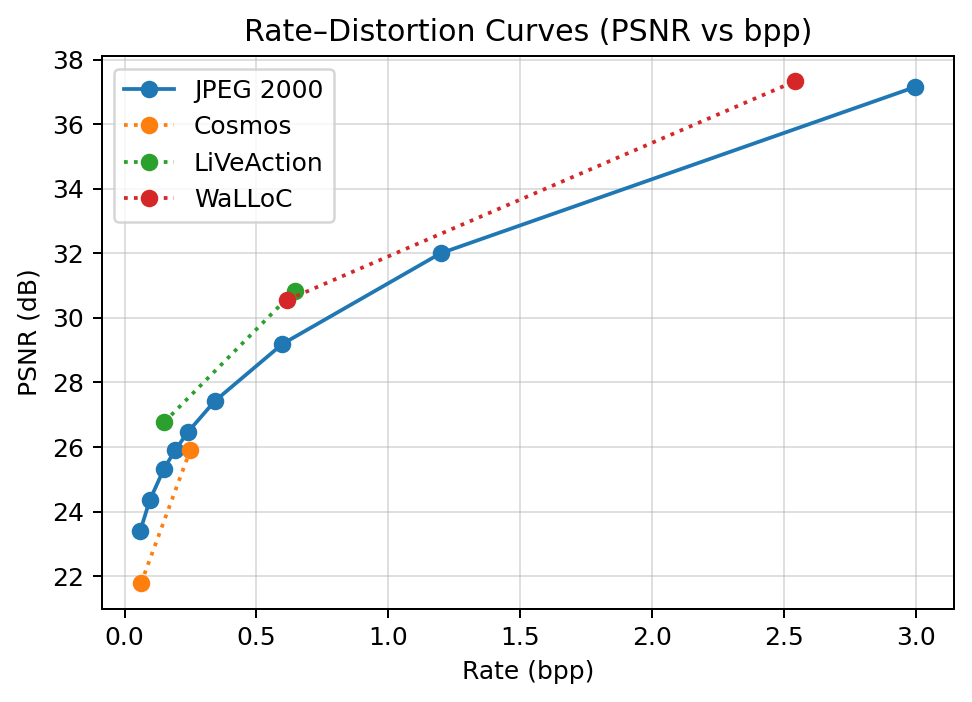

In [1]:
import bjontegaard as bd
import matplotlib.pyplot as plt
r_j2k  = [0.0597, 0.0957, 0.1495, 0.1916, 0.2393, 0.3423, 0.5985, 1.1984, 2.9980]  # bpp
d_j2k  = [23.4048, 24.3492, 25.3227, 25.8947, 26.4546, 27.4229, 29.1910, 32.0019, 37.1560]  # PSNR
r_cosmos = [0.0625, 0.2500]
d_cosmos = [21.7743, 25.9193]
r_live = [0.1507, 0.6456]
d_live = [26.7708, 30.8464]
r_walloc = [0.6171, 2.5436]
d_walloc = [30.5576, 37.3370]
plt.figure(figsize=(5.5, 4), dpi=180)
plt.plot(r_j2k, d_j2k, marker='o', linestyle='-', label='JPEG 2000')
plt.plot(r_cosmos, d_cosmos, marker='o', linestyle=':', label='Cosmos')
plt.plot(r_live,   d_live,   marker='o', linestyle=':', label='LiVeAction')
plt.plot(r_walloc, d_walloc, marker='o', linestyle=':', label='WaLLoC')
plt.xlabel("Rate (bpp)")
plt.ylabel("PSNR (dB)")
plt.title("Rate–Distortion Curves (PSNR vs bpp)")
plt.grid(True, alpha=0.4)
plt.legend(loc='best')
plt.tight_layout()
bd_cosmos = bd.bd_rate(r_j2k, d_j2k, r_cosmos, d_cosmos,
                       method='pchip', require_matching_points=False)
bd_live   = bd.bd_rate(r_j2k, d_j2k, r_live,   d_live,
                       method='pchip', require_matching_points=False)
bd_walloc = bd.bd_rate(r_j2k, d_j2k, r_walloc, d_walloc,
                       method='pchip', require_matching_points=False)
print(f"BD-Rate (Cosmos vs JPEG 2000):  {bd_cosmos:+.4f} %")
print(f"BD-Rate (LiVeAction vs JPEG 2000): {bd_live:+.4f} %")
print(f"BD-Rate (WaLLoC vs JPEG 2000):  {bd_walloc:+.4f} %")
plt.show()

---
BD Rate
---
---

In [1]:
import io, os, fastprogress, PIL.Image, datasets, torch, numpy as np
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor
from piq import LPIPS, DISTS, SSIMLoss

In [2]:
kodak = datasets.load_dataset('danjacobellis/kodak',split='validation')
bpp, psnr, lpips_db, dists_db, ssim = [], [], [], [], []
pb = fastprogress.progress_bar(kodak)
device = 'cuda'
lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
for sample in pb:
    bpp.append([])
    psnr.append([])
    lpips_db.append([])
    dists_db.append([])
    ssim.append([])
    img = sample['image']
    for cr in [400,250,160,125,100,70,40,20,8]:
        buff = io.BytesIO()
        img.save(buff, format='JPEG2000', quality_layers=[cr])
        img_rec = PIL.Image.open(buff)
        bppi = 8*(len(buff.getbuffer()))/(img.width*img.height)
    
        x_orig_01 = pil_to_tensor(img).to(torch.float).unsqueeze(0).to(device)/255
        x_hat_01 = pil_to_tensor(img_rec).to(torch.float).unsqueeze(0).to(device)/255
        mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
        PSNR = -10 * mse.log10().item()
        LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
        DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
        SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

        bpp[-1].append(bppi)
        psnr[-1].append(PSNR)
        lpips_db[-1].append(LPIPS_dB)
        dists_db[-1].append(DISTS_dB)
        ssim[-1].append(SSIM)
bpp_mean       = torch.tensor(bpp,       dtype=torch.float32).mean(dim=0); print(bpp_mean)
psnr_mean      = torch.tensor(psnr,      dtype=torch.float32).mean(dim=0); print(psnr_mean)
lpips_db_mean  = torch.tensor(lpips_db,  dtype=torch.float32).mean(dim=0); print(lpips_db_mean)
dists_db_mean  = torch.tensor(dists_db,  dtype=torch.float32).mean(dim=0); print(dists_db_mean)
ssim_mean      = torch.tensor(ssim,      dtype=torch.float32).mean(dim=0); print(ssim_mean)

tensor([0.0597, 0.0957, 0.1495, 0.1916, 0.2393, 0.3423, 0.5985, 1.1984, 2.9980])
tensor([23.4048, 24.3492, 25.3227, 25.8947, 26.4546, 27.4229, 29.1910, 32.0019,
        37.1560])
tensor([2.1388, 2.4231, 2.7599, 2.9724, 3.1854, 3.5425, 4.2655, 5.4387, 8.2494])
tensor([ 5.1450,  5.7073,  6.3334,  6.7353,  7.1317,  7.7950,  9.1768, 11.3646,
        16.1444])
tensor([0.6378, 0.6842, 0.7324, 0.7586, 0.7829, 0.8182, 0.8712, 0.9262, 0.9746])


---
live action f16c48
---
---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from autocodec.codec import AutoCodecND, latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/autocodec",
    filename="rgb_f16c48_ft.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
config = checkpoint['config']
codec = AutoCodecND(
    dim=2,
    input_channels=config.input_channels,
    J = int(np.log2(config.F)),
    latent_dim=config.latent_dim,
    encoder_depth = config.encoder_depth,
    encoder_kernel_size = config.encoder_kernel_size,
    decoder_depth = config.decoder_depth,
    lightweight_encode = config.lightweight_encode,
    lightweight_decode = config.lightweight_decode,
).to(device).to(torch.bfloat16)
codec.load_state_dict(checkpoint['state_dict'])
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.bfloat16) / 127.5 - 1.0
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encode(x_orig)
        latent = codec.quantize.compand(z).round()
    webp = latent_to_pil(latent.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=config.latent_dim, n_bits=8, C=3).to(device).to(torch.bfloat16)
    with torch.no_grad():
        x_hat = codec.decode(latent_decoded).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.7802615695529515
PSNR: 31.03515625
LPIPS_dB: 7.04490827424515
DISTS_dB: 13.877594294056875
SSIM: 0.8351236979166666


In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from autocodec.codec import AutoCodecND, latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/autocodec",
    filename="rgb_f16c48.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
config = checkpoint['config']
codec = AutoCodecND(
    dim=2,
    input_channels=config.input_channels,
    J = int(np.log2(config.F)),
    latent_dim=config.latent_dim,
    encoder_depth = config.encoder_depth,
    encoder_kernel_size = config.encoder_kernel_size,
    decoder_depth = config.decoder_depth,
    lightweight_encode = config.lightweight_encode,
    lightweight_decode = config.lightweight_decode,
).to(device).to(torch.bfloat16)
codec.load_state_dict(checkpoint['state_dict'])
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

rgb_f16c48.pth:   0%|          | 0.00/306M [00:00<?, ?B/s]

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.bfloat16) / 127.5 - 1.0
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encode(x_orig)
        latent = codec.quantize.compand(z).round()
    webp = latent_to_pil(latent.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=config.latent_dim, n_bits=8, C=3).to(device).to(torch.bfloat16)
    with torch.no_grad():
        x_hat = codec.decode(latent_decoded).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.6455654568142362
PSNR: 30.846354166666668
LPIPS_dB: 6.750272797771676
DISTS_dB: 13.422796385256314
SSIM: 0.82958984375


---
F8C48 with EM
---
---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from autocodec.codec import AutoCodecND, latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

In [3]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/autocodec",
    filename="rgb_f16c48_em.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
config = checkpoint['config']
codec = AutoCodecND(
    dim=2,
    input_channels=config.input_channels,
    J = int(np.log2(config.F)),
    latent_dim=config.latent_dim,
    encoder_depth = config.encoder_depth,
    encoder_kernel_size = config.encoder_kernel_size,
    decoder_depth = config.decoder_depth,
    lightweight_encode = config.lightweight_encode,
    lightweight_decode = config.lightweight_decode,
).to(device).to(torch.bfloat16)
codec.load_state_dict(checkpoint['state_dict'])
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

rgb_f16c48_em.pth:   0%|          | 0.00/306M [00:00<?, ?B/s]

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.bfloat16) / 127.5 - 1.0
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encode(x_orig)
        latent = codec.quantize.compand(z).round()
    webp = latent_to_pil(latent.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=config.latent_dim, n_bits=8, C=3).to(device).to(torch.bfloat16)
    with torch.no_grad():
        x_hat = codec.decode(latent_decoded).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [5]:
results_dataset = dataset['validation'].map(evaluate_quality)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [6]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.8407779269748263
PSNR: 30.80078125
LPIPS_dB: 6.528678864723134
DISTS_dB: 13.503324797970388
SSIM: 0.8421223958333334


---
liveaction f16c12
---
---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from autocodec.codec import AutoCodecND, latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/autocodec",
    filename="rgb_f16c12_ft.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
config = checkpoint['config']
codec = AutoCodecND(
    dim=2,
    input_channels=config.input_channels,
    J = int(np.log2(config.F)),
    latent_dim=config.latent_dim,
    encoder_depth = config.encoder_depth,
    encoder_kernel_size = config.encoder_kernel_size,
    decoder_depth = config.decoder_depth,
    lightweight_encode = config.lightweight_encode,
    lightweight_decode = config.lightweight_decode,
).to(device).to(torch.bfloat16)
codec.load_state_dict(checkpoint['state_dict'])
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

rgb_f16c12_ft.pth:  75%|#######5  | 231M/306M [00:00<?, ?B/s]

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.bfloat16) / 127.5 - 1.0
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encode(x_orig)
        latent = codec.quantize.compand(z).round()
    webp = latent_to_pil(latent.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=config.latent_dim, n_bits=8, C=3).to(device).to(torch.bfloat16)
    with torch.no_grad():
        x_hat = codec.decode(latent_decoded).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.18493143717447916
PSNR: 26.97265625
LPIPS_dB: 4.7562505625050795
DISTS_dB: 9.379736408196386
SSIM: 0.7394205729166666


---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from autocodec.codec import AutoCodecND, latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/autocodec",
    filename="rgb_f16c12.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
config = checkpoint['config']
codec = AutoCodecND(
    dim=2,
    input_channels=config.input_channels,
    J = int(np.log2(config.F)),
    latent_dim=config.latent_dim,
    encoder_depth = config.encoder_depth,
    encoder_kernel_size = config.encoder_kernel_size,
    decoder_depth = config.decoder_depth,
    lightweight_encode = config.lightweight_encode,
    lightweight_decode = config.lightweight_decode,
).to(device).to(torch.bfloat16)
codec.load_state_dict(checkpoint['state_dict'])
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

rgb_f16c12.pth:   0%|          | 0.00/306M [00:00<?, ?B/s]

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.bfloat16) / 127.5 - 1.0
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encode(x_orig)
        latent = codec.quantize.compand(z).round()
    webp = latent_to_pil(latent.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=config.latent_dim, n_bits=8, C=3).to(device).to(torch.bfloat16)
    with torch.no_grad():
        x_hat = codec.decode(latent_decoded).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.15073140462239584
PSNR: 26.770833333333332
LPIPS_dB: 4.522872237559315
DISTS_dB: 8.996013821472557
SSIM: 0.7294921875


---
balle 2018
---
---

In [1]:
import io, torch, datasets, compressai, time, PIL.Image, numpy as np, pickle, gzip
from piq import LPIPS, DISTS, SSIMLoss
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

/home/dgj335/.local/lib/python3.10/site-packages/compressai/models/video/google.py:353: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @amp.autocast(enabled=False)


In [2]:
model = compressai.zoo.bmshj2018_hyperprior(quality=2, metric='mse', pretrained=True)
device = 'cuda'
dataset = datasets.load_dataset("danjacobellis/kodak")
model.to(device);
model.eval();
lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

Downloading: "https://compressai.s3.amazonaws.com/models/v1/bmshj2018-hyperprior-2-93677231.pth.tar" to /home/dgj335/.cache/torch/hub/checkpoints/bmshj2018-hyperprior-2-93677231.pth.tar
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20.2M/20.2M [00:05<00:00, 3.87MB/s]
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT`

In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.float) / 255
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = model.compress(x_orig)
        y = model.g_a(x_orig)
        z = model.h_a(torch.abs(y))
        z_strings = model.entropy_bottleneck.compress(z)
        z_hat = model.entropy_bottleneck.decompress(z_strings, z.size()[-2:])
        scales_hat = model.h_s(z_hat)
        indexes = model.gaussian_conditional.build_indexes(scales_hat)
        y_strings = model.gaussian_conditional.compress(y, indexes)
        compressed = {"strings": [y_strings, z_strings], "shape": z.size()[-2:]}
        
    buff = io.BytesIO()
    with gzip.open(buff, "wb") as f:
            pickle.dump(compressed, f, protocol=pickle.HIGHEST_PROTOCOL)
    size_bytes = len(buff.getbuffer())
    with torch.no_grad():
        x_hat =model.decompress(compressed['strings'],compressed['shape'])['x_hat']
    x_orig_01 = x_orig
    x_hat_01 = torch.nan_to_num(x_hat, nan=0.0)
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality, load_from_cache_file=False)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.21106974283854166
PSNR: 27.237699031829834
LPIPS_dB: 3.9050192956548884
DISTS_dB: 7.997291026695748
SSIM: 0.8258112445473671


---
walloc 16x
---
---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np, json
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from walloc import walloc
from walloc.walloc import latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
config_file = hf_hub_download(
    repo_id="danjacobellis/walloc",
    filename="RGB_16x.json"
)
codec_config = SimpleNamespace(**json.load(open(config_file)))
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/walloc",
    filename="RGB_16x.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
codec = walloc.Codec2D(
    channels = codec_config.channels,
    J = codec_config.J,
    Ne = codec_config.Ne,
    Nd = codec_config.Nd,
    latent_dim = codec_config.latent_dim,
    latent_bits = codec_config.latent_bits,
    lightweight_encode = codec_config.lightweight_encode
)
codec.load_state_dict(checkpoint['model_state_dict'])
codec = codec.to(device)
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.float) / 255 - 0.5
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encoder(codec.wavelet_analysis(x_orig,J=codec.J))
    webp = latent_to_pil(z.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=codec_config.latent_dim, n_bits=8, C=3).to(device).to(torch.float16)
    with torch.no_grad():
        x_hat = codec.wavelet_synthesis(codec.decoder(z),J=codec.J).clamp(-0.5,0.5)
    x_orig_01 = x_orig + 0.5
    x_hat_01 = x_hat + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.6171129014756944
PSNR: 30.557596782843273
LPIPS_dB: 6.513779126102302
DISTS_dB: 13.243720676934606
SSIM: 0.950053483247757


---
walloc 4x
---
---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np, json
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from walloc import walloc
from walloc.walloc import latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
config_file = hf_hub_download(
    repo_id="danjacobellis/walloc",
    filename="RGB_4x.json"
)
codec_config = SimpleNamespace(**json.load(open(config_file)))
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/walloc",
    filename="RGB_4x.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
codec = walloc.Codec2D(
    channels = codec_config.channels,
    J = codec_config.J,
    Ne = codec_config.Ne,
    Nd = codec_config.Nd,
    latent_dim = codec_config.latent_dim,
    latent_bits = codec_config.latent_bits,
    lightweight_encode = codec_config.lightweight_encode
)
codec.load_state_dict(checkpoint['model_state_dict'])
codec = codec.to(device)
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

RGB_4x.json:   0%|          | 0.00/388 [00:00<?, ?B/s]

RGB_4x.pth:   0%|          | 0.00/229M [00:00<?, ?B/s]

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.float) / 255 - 0.5
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encoder(codec.wavelet_analysis(x_orig,J=codec.J))
    webp = latent_to_pil(z.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=codec_config.latent_dim, n_bits=8, C=3).to(device).to(torch.float16)
    with torch.no_grad():
        x_hat = codec.wavelet_synthesis(codec.decoder(z),J=codec.J).clamp(-0.5,0.5)
    x_orig_01 = x_orig + 0.5
    x_hat_01 = x_hat + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 2.5435909695095487
PSNR: 37.337041000525154
LPIPS_dB: 11.673939380783379
DISTS_dB: 18.29417419215874
SSIM: 0.9873491401473681


---
cosmos
---
---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import snapshot_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor
from cosmos_tokenizer.image_lib import ImageTokenizer

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
model_path = snapshot_download(repo_id='nvidia/Cosmos-Tokenizer-DI8x8')
encoder = ImageTokenizer(checkpoint_enc=f'{model_path}/encoder.jit').to(device)
decoder = ImageTokenizer(checkpoint_dec=f'{model_path}/decoder.jit').to(device)

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

autoencoder.jit:   0%|          | 0.00/159M [00:00<?, ?B/s]

decoder.jit:   0%|          | 0.00/94.5M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

encoder.jit:   0%|          | 0.00/65.5M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

model_config.yaml:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.float) / 127.5 - 1.0
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = encoder.encode(x_orig)[0]
    size_bytes = 2*z.numel()
    with torch.no_grad():
        x_hat = decoder.decode(z).to(torch.float).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

Parameter 'function'=<function evaluate_quality at 0x748ae421e830> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.25
PSNR: 25.919317603111267
LPIPS_dB: 7.711161962844201
DISTS_dB: 13.264738029047363
SSIM: 0.8557981674869856


---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import snapshot_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor
from cosmos_tokenizer.image_lib import ImageTokenizer

In [2]:
device = "cuda"
dataset = datasets.load_dataset("danjacobellis/kodak")
model_path = snapshot_download(repo_id='nvidia/Cosmos-Tokenizer-DI16x16')
encoder = ImageTokenizer(checkpoint_enc=f'{model_path}/encoder.jit').to(device)
decoder = ImageTokenizer(checkpoint_dec=f'{model_path}/decoder.jit').to(device)

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample):
    img = sample['image'].convert("RGB")
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.float) / 127.5 - 1.0
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = encoder.encode(x_orig)[0]
    size_bytes = 2*z.numel()
    with torch.no_grad():
        x_hat = decoder.decode(z).to(torch.float).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)

Parameter 'function'=<function evaluate_quality at 0x7a8987f5c160> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/24 [00:00<?, ? examples/s]

In [5]:
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 0.0625
PSNR: 21.77425762017568
LPIPS_dB: 5.378436234862551
DISTS_dB: 10.618903597362483
SSIM: 0.6448745379845301
